# Exploring Zillow Data

In [1]:
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
zillow_data = pd.read_csv('http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_Summary_AllHomes.csv')
zillow_data.fillna("", inplace=True)
zillow_data["County and state"] = zillow_data["County"] + ", " + zillow_data["State"]
zillow_data.head()

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI,County and state
0,2017-05-31,61639,10025,NY,New York,New York,New York,0,1178700,0.030602,0.051097,0.108739,0.0888014,0.049093,2017-05,2017-Q2,1178700,0.000000,2017-05,"New York, NY"
1,2017-05-31,84654,60657,IL,Chicago,Cook,Chicago,1,327700,0.005523,0.017070,0.0311517,0.0455279,0.00216158,2017-05,2017-Q2,327700,0.000000,2017-05,"Cook, IL"
2,2017-05-31,84616,60614,IL,Chicago,Cook,Chicago,2,401900,-0.008633,-0.040124,-0.00519802,0.0450681,0.002856,2017-02,2017-Q1,418700,-0.040124,2016-09,"Cook, IL"
3,2017-05-31,93144,79936,TX,El Paso,El Paso,El Paso,3,114800,0.000872,-0.001739,0.025,0.00228033,-0.0115944,2007-12,2007-Q4,131100,-0.124333,2006-09,"El Paso, TX"
4,2017-05-31,84640,60640,IL,Chicago,Cook,Chicago,4,205700,-0.004356,0.002437,0.0505618,0.0484064,-0.014355,2007-02,2007-Q1,237800,-0.134987,2003-06,"Cook, IL"


In [3]:
census_data = pd.read_excel('https://www.census.gov/did/www/saipe/downloads/estmod15/est15ALL.xls')
census_data.columns = census_data.iloc[2] # Renames columns - found in 3rd row of source file
census_data.drop(census_data.index[:3], inplace=True)
census_data["County and state"] = census_data["Name"] + ", " + census_data["Postal Code"]

### Worst places to live (as determined using mean income)

In [4]:
result = pd.merge(zillow_data, census_data, left_on=['County', 'State'], right_on=['Name', 'Postal Code'])
result.set_index(['County', 'State'])
median_income = result['Median Household Income'].astype(float)
zhvi = result['Zhvi'].astype(float)
result['housing_index'] = zhvi / median_income

subset = result[['County', 'State', 'housing_index']].copy()
subset = subset.groupby(['County', 'State']).mean().sort_values(['housing_index'], ascending=False)
subset

,,housing_index
County,State,
New York,NY,22.423869
District of Columbia,DC,8.171927
Carson City,NV,6.070403
Hawaii,HI,4.869083
Utah,UT,4.472837
Oklahoma,OK,3.051211


*** Not sure whether to use max or mean value of housing index found per county. Doesn't seem to make much difference. ***

In [5]:
subset.groupby(['County', 'State']).max().sort_values(['housing_index'], ascending=False)

,,housing_index
County,State,
New York,NY,22.423869
District of Columbia,DC,8.171927
Carson City,NV,6.070403
Hawaii,HI,4.869083
Utah,UT,4.472837
Oklahoma,OK,3.051211


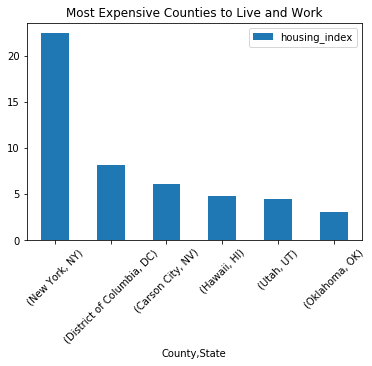

In [6]:
subset.plot(kind='bar', y='housing_index', rot=45, title="Most Expensive Counties to Live and Work")